In [23]:
import cv2
import numpy as np
import pandas as pd
from datetime import datetime

import glob

PATH = "/Users/raminduwalgama/Documents/Projects/OneID/icao-guidelines-server/detectors/blur/laplacian/"
all_images = glob.glob("../../../dataset/valid/*.JPG")

In [24]:
def logger(image, blur_amount, variance, is_blurred=None, threshold=None, path="./"):
    time_str = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    df_headers = pd.DataFrame({
        'log_time': [time_str],
        'image': [image],
        'gaussian_blur': [blur_amount],
        'variance': [variance],
        # 'is_blurred': [is_blurred],
        # 'threshold': [threshold]
    })
    df_headers.to_csv(f'{path}blur_logs.csv', mode='a', index=False, header=False)

In [25]:
def is_image_blurry(variance, threshold=100):
    if variance < threshold:
        return True
    return False


In [26]:
def laplacian_variance(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian.var()

### Blur value means
Kept in arrays to plot separately.

In [27]:
original_vals = []
gaussian_blur3_vals = []
gaussian_blur5_vals = []
gaussian_blur7_vals = []

In [28]:
# time duration
start_time = datetime.now()

for j in range(0, int(len(all_images))):
    threshold = 100
    image_name = all_images[j]
    image = cv2.imread(image_name)
    original_var = laplacian_variance(image)
    original_vals.append(original_var)

    logger(image_name, 0, original_var, PATH)

    # print(image_name)

    for i in range(3, 8, 2):
        blur_factor = i

        img2 = cv2.GaussianBlur(image, (blur_factor, blur_factor), 0)
        blur_var = laplacian_variance(img2)

        if blur_factor == 3:
            gaussian_blur3_vals.append(blur_var)
        elif blur_factor == 5:
            gaussian_blur5_vals.append(blur_var)
        elif blur_factor == 7:
            gaussian_blur7_vals.append(blur_var)

        logger(image_name, blur_factor, original_var, PATH)

print("------------------COMPLETED------------------")

end_time = datetime.now()
print('Unit: seconds')
print('Duration: {}'.format(end_time - start_time))
print('Duration per image: {}'.format((end_time - start_time)/len(all_images)))


../../../dataset/valid/N239001014.JPG
../../../dataset/valid/N230201570.JPG
../../../dataset/valid/N230101709.JPG
../../../dataset/valid/N230701220.JPG
../../../dataset/valid/N230301766.JPG
../../../dataset/valid/N230601354.JPG
../../../dataset/valid/N230601432.JPG
../../../dataset/valid/N230101669.JPG
../../../dataset/valid/N230101899.JPG
../../../dataset/valid/N230601368.JPG
../../../dataset/valid/N231601055.JPG
../../../dataset/valid/N230101696.JPG
../../../dataset/valid/N230601630.JPG
../../../dataset/valid/N230501688.JPG
../../../dataset/valid/N231701531.JPG
../../../dataset/valid/N239001148.JPG
../../../dataset/valid/N230201404.JPG
../../../dataset/valid/N230201439.JPG
../../../dataset/valid/N230201405.JPG
../../../dataset/valid/N231701524.JPG
../../../dataset/valid/N238100624.JPG
../../../dataset/valid/N230101683.JPG
../../../dataset/valid/N231501013.JPG
../../../dataset/valid/N231501007.JPG
../../../dataset/valid/N231701726.JPG
../../../dataset/valid/N230601427.JPG
../../../dat

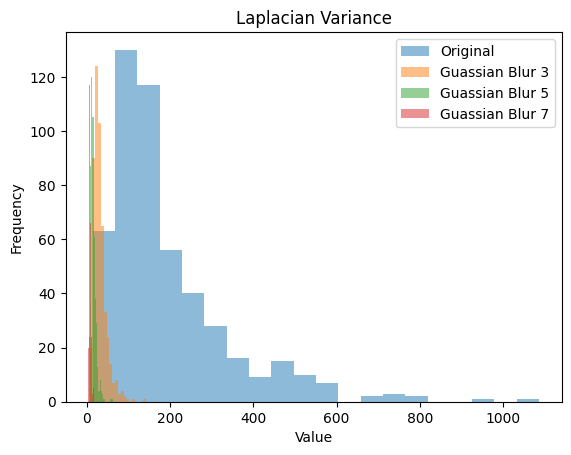

In [29]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# original_vals = [i for i in original_vals if i < 200]
# original_vals = [i for i in original_vals if i > 75]

# Plot the histograms
n_bins = 20  # Number of bins in the histogram
ax.hist(original_vals, bins=n_bins, alpha=0.5, label='Original')
ax.hist(gaussian_blur3_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 3')
ax.hist(gaussian_blur5_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 5')
ax.hist(gaussian_blur7_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 7')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Laplacian Variance')

# Add legend
ax.legend()
plt.savefig(PATH + 'laplacian_variance.png')

# Show the plot
plt.show()


## THRESHOLD = 75

In [ ]:
THRESHOLD = 75

## Error Analysis

In [32]:
from tabulate import tabulate

# Error estimations
original_size = len(original_vals)
original_vals_copy = [i for i in original_vals if i > THRESHOLD]
filtered_size = len(original_vals_copy)

blur3_incorrect_size = len([i for i in gaussian_blur3_vals if i > THRESHOLD])
blur5_incorrect_size = len([i for i in gaussian_blur5_vals if i > THRESHOLD])
blur7_incorrect_size = len([i for i in gaussian_blur7_vals if i > THRESHOLD])

headers = ["GBlur Factor", "Incorrect Images", "Incorrect Percentage"]
table = [
    ["Original-Missing", filtered_size, f"{(original_size-filtered_size)/original_size*100}%"],
    ["GBlur 3", blur3_incorrect_size, f"{blur3_incorrect_size/original_size*100}%"],
    ["GBlur 5", blur5_incorrect_size, f"{blur5_incorrect_size/original_size*100}%"],
    ["GBlur 7", blur7_incorrect_size, f"{blur7_incorrect_size/original_size*100}%"]
]

print(tabulate(table, headers, tablefmt="simple_grid"))

print(f"Original size: {original_size}")
print(f"Filtered size: {filtered_size}")
print(f"Filtered percentage: {filtered_size/original_size*100}%")


┌──────────────────┬────────────────────┬────────────────────────┐
│ GBlur Factor     │   Incorrect Images │ Incorrect Percentage   │
├──────────────────┼────────────────────┼────────────────────────┤
│ Original-Missing │                420 │ 16.0%                  │
├──────────────────┼────────────────────┼────────────────────────┤
│ GBlur 3          │                 12 │ 2.4%                   │
├──────────────────┼────────────────────┼────────────────────────┤
│ GBlur 5          │                  0 │ 0.0%                   │
├──────────────────┼────────────────────┼────────────────────────┤
│ GBlur 7          │                  0 │ 0.0%                   │
└──────────────────┴────────────────────┴────────────────────────┘
Original size: 500
Filtered size: 420
Filtered percentage: 84.0%


## Filtered Histogram

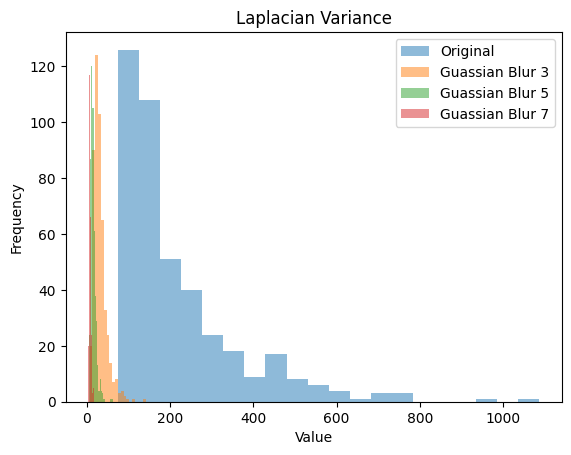

In [31]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the histograms
n_bins = 20  # Number of bins in the histogram
ax.hist(original_vals_copy, bins=n_bins, alpha=0.5, label='Original')
ax.hist(gaussian_blur3_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 3')
ax.hist(gaussian_blur5_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 5')
ax.hist(gaussian_blur7_vals, bins=n_bins, alpha=0.5, label='Guassian Blur 7')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Laplacian Variance')

# Add legend
ax.legend()
plt.savefig(PATH + 'laplacian_variance.png')

# Show the plot
plt.show()
